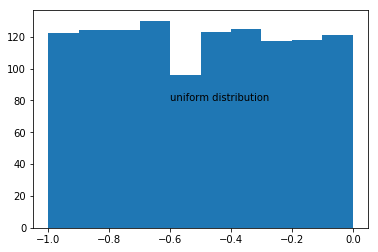

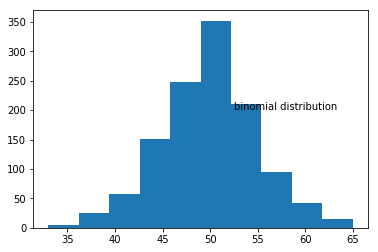

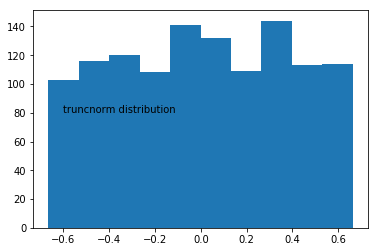

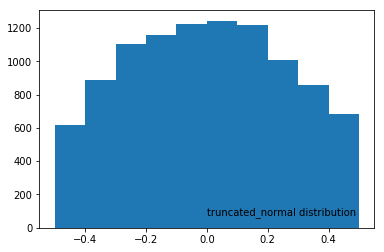

In [26]:
import numpy as np #core network algo
import matplotlib.pyplot as plt #for plotting
from scipy.stats import truncnorm

samples = 1200
low = -1
high = 0

s = np.random.uniform(low, high, samples)
plt.hist(s)
plt.text(-0.6,80, "uniform distribution")
plt.show()

s = np.random.binomial(100,0.5,1200)
plt.hist(s)
plt.text(52.5,200, "binomial distribution")
plt.show()

s = truncnorm(a=-2/3., b=2/3., scale=1, loc=0).rvs(size = 1200)
plt.hist(s)
plt.text(-0.6,80, "truncnorm distribution")
plt.show()

def truncated_normal(mean= 0, sd= 1, low= 0, upp= 10):
    return truncnorm(
    (low-mean)/sd, (upp-mean)/sd, loc=mean, scale = sd
    )
X = truncated_normal(mean= 0, sd= 0.4, low= -0.5, upp= 0.5)
s = X.rvs(10000)
plt.hist(s)
plt.text(0,80, "truncated_normal distribution")
plt.show()

In [25]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [32]:
##input matrix

no_of_input_nodes = train_images.shape[1]*train_images.shape[2]
no_of_hidden_nodes = 512
rad = 1/np.sqrt(no_of_input_nodes)
X = truncated_normal(mean= 2, sd= 1, low= -rad, upp= rad)
wih = X.rvs((no_of_hidden_nodes,no_of_input_nodes))
#wih = X.rvs(no_of_hidden_nodes)
print(wih.shape)

(512, 784)


In [37]:
## output matrix

no_of_output_nodes = len(list(set(train_labels)))
rad = 1/np.sqrt(no_of_hidden_nodes)
X = truncated_normal(mean= 2, sd= 1, low= -rad, upp= rad)
who = X.rvs((no_of_output_nodes,no_of_hidden_nodes))

(10, 512)


In [53]:
## defining class
from scipy.special import expit as activation_function

class NeuralNetwork:
    

    
    def __init__(self,
                no_of_input_nodes,
                no_of_output_nodes,
                no_of_hidden_nodes,
                learning_rate):
        self.no_of_input_nodes = no_of_input_nodes
        self.no_of_output_nodes = no_of_output_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate
        self.create_weight_matrices()
        
    def create_weight_matrices(self):
        rad = 1/np.sqrt(self.no_of_input_nodes)
        X = truncated_normal(mean= 0, sd= 1, low= -rad, upp= rad)
        self.weights_input_hidden = X.rvs((self.no_of_hidden_nodes, self.no_of_input_nodes))
        
        rad = 1/np.sqrt(self.no_of_input_nodes)
        X = truncated_normal(mean= 0, sd= 1, low= -rad, upp= rad)
        self.weights_hidden_output = X.rvs((self.no_of_output_nodes, self.no_of_hidden_nodes))
    
    def truncated_normal(mean= 0, sd= 1, low= 0, upp= 10):
        return truncnorm(
        (low-mean)/sd, (upp-mean)/sd, loc=mean, scale = sd
    )
    
    def train(self, input_vector, target_vector):
        input_vector = np.array(input_vector, ndmin=2).T
        target_vector = np.array(target_vector, ndmin=2).T
        output_vector1 = np.dot(self.weights_input_hidden, input_vector)
        output_vector_hidden = activation_function(output_vector1)
        output_vector2 = np.dot(self.weights_hidden_output, output_vector_hidden)
        output_vector_network = activation_function(output_vector2)
        
        output_error = target_vector - output_vector_network
        
        tmp = output_error * output_vector_network * (1.0 - output_vector_network)
        tmp = self.learning_rate * np.dot(tmp, output_vector_hidden.T)
        self.weights_hidden_output += tmp
        
        hidden_errors = np.dot(self.weights_hidden_output.T, output_error)
        tmp = hidden_errors * output_vector_hidden * (1.0 - output_vector_hidden)
        self.weights_input_hidden += self.learning_rate * np.dot(tmp, input_vector.T)
        
    
    def run(self, input_vector):
        input_vector = np.array(input_vector, ndmin=2).T
        output_vector = np.dot(self.weights_input_hidden, input_vector)
        output_vector = activation_function(output_vector)
        
        output_vector = np.dot(self.weights_hidden_output, output_vector)
        output_vector = activation_function(output_vector)
        
        return output_vector
    
if __name__ == "__main__":
    simple_network = NeuralNetwork(2, 2, 10, 0.6)
    print(simple_network.run([(3,4)]))


[[0.33569656]
 [0.54814179]]


https://www.python-course.eu/neural_networks_with_python_numpy.php